In [132]:
# Import necessary libraries
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
def extract_spectrogram(file_path):
    try:
        # Load audio file (limit duration to 5 seconds)
        y, sr = librosa.load(file_path, duration=5.0)
        print(f"Loaded audio: {file_path}, duration: {len(y)} samples")  # Debugging

        # Extract Mel Spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

        if spectrogram.size == 0:
            print(f"Warning: Empty Spectrogram for file {file_path}")
            return None, None  # Return None for both spectrogram and sr if there's an error

        # Normalize the spectrogram (optional step)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        return spectrogram, sr
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None  # Return None if there's an error

In [134]:
def load_data(directory):
    features = []
    labels = []
    print(f"Scanning directory: {directory}")
    
    # Recursively walk through directories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            print(f"Found file: {filename}")  # Debugging
            if filename.endswith('.wav'):  # Only process .wav files
                file_path = os.path.join(root, filename)
                print(f"Processing file: {file_path}")  # Debugging
                feature = extract_features(file_path)
                if feature is not None:  # Ensure features are not None
                    print(f"Feature shape: {feature.shape} for file {file_path}")  # Debugging
                    label = os.path.basename(root)  # Use the directory name as the label
                    features.append(feature)
                    labels.append(label)
                else:
                    print(f"Warning: Feature extraction failed for {file_path}")
    # Convert features to a NumPy array
    features = np.array(features)
    labels = np.array(labels)
    print(f"Loaded {len(features)} features and {len(labels)} labels.")  # Summary
    return features, labels

In [172]:
import os

directory = "/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds"  # Replace with the actual directory path
if os.path.exists(directory):
    print(f"Directory exists: {directory}")
    print("Files and subdirectories:")
    for root, dirs, files in os.walk(directory):
        print(f"In {root}:")
        print(f"  Directories: {dirs}")
        print(f"  Files: {files}")
else:
    print(f"Directory does not exist: {directory}")


Directory exists: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds
Files and subdirectories:
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds:
  Directories: ['Voice_of_Birds', 'Voice of Birds']
  Files: ['.DS_Store', 'Birds Voice.csv']
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds:
  Directories: ['bird_species']
  Files: ['.DS_Store']
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species:
  Directories: ['Moluccan Megapode_sound', 'Micronesian Megapode_sound', 'Andean Tinamou_sound', 'Wattled Brushturkey_sound', 'Red-billed Brushturkey_sound', 'Little Tinamou_sound', 'Speckled Chachalaca_sound', 'Somali Ostrich_sound', 'Chestnut-bellied Guan_sound', 'Spixs Guan_sound', 'Rusty-margined Guan_sound', 'Great Spotted Kiwi_sound', 'Brushland Tinamou_sound', 'Huayco Tinamou_sound', 'Vanuatu Megapode_sound', 'Darwins Nothura

In [136]:
# Prompt user for the path to the 'bird_sounds' directory
directory = input("Please enter the path to the 'bird_sounds' directory: ").strip()

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Error: The directory '{directory}' does not exist. Please check the path and try again.")
else:
    # Load the dataset
    X, y = load_data(directory)
    
    if len(y) == 0:
        print("Error: No features were loaded. Exiting.")
    else:
        print(f"Successfully loaded {len(X)} samples.")

Scanning directory: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds
Found file: .DS_Store
Found file: Birds Voice.csv
Found file: .DS_Store
Found file: .DS_Store
Found file: Moluccan Megapode3.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav: module 'soundfile' has no attribute 'SoundFileRuntimeError'
Found file: Moluccan Megapode2.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode2.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluc

/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/env/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=576
  warnings.warn(


Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode15.wav, duration: 110250 samples
Feature shape: (13,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode15.wav
Found file: Dusky Megapode29.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode29.wav
Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode29.wav, duration: 110250 samples
Feature shape: (13,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode29.wav
Found file: Dusky Megapode17.wav
Processing file: /User

In [137]:
# Display the first few labels
unique_labels = np.unique(y)
print(f"Unique labels (bird species): {unique_labels}")

# Check the shape and type of features
print(f"Type of X: {type(X)}")
print(f"Number of feature samples: {len(X)}")
if len(X) > 0:
    print(f"Each feature shape: {X[0].shape} (MFCCs)")

Unique labels (bird species): ['Andean Guan_sound' 'Andean Tinamou_sound' 'Australian Brushturkey_sound'
 'Band-tailed Guan_sound' 'Barred Tinamou_sound' 'Bartletts Tinamou_sound'
 'Baudo Guan_sound' 'Bearded Guan_sound' 'Berlepschs Tinamou_sound'
 'Biak Scrubfowl_sound' 'Black Tinamou_sound'
 'Black-billed Brushturkey_sound' 'Black-capped Tinamou_sound'
 'Black-fronted Piping Guan_sound' 'Blue-throated Piping Guan_sound'
 'Brazilian Tinamou_sound' 'Brown Tinamou_sound' 'Brushland Tinamou_sound'
 'Buff-browed Chachalaca_sound' 'Cauca Guan_sound'
 'Chaco Chachalaca_sound' 'Chestnut-bellied Guan_sound'
 'Chestnut-headed Chachalaca_sound' 'Chestnut-winged Chachalaca_sound'
 'Chilean Tinamou_sound' 'Choco Tinamou_sound' 'Cinereous Tinamou_sound'
 'Collared Brushturkey_sound' 'Colombian Chachalaca_sound'
 'Common Ostrich_sound' 'Crested Guan_sound' 'Curve-billed Tinamou_sound'
 'Darwins Nothura_sound' 'Dusky Megapode_sound' 'Dusky-legged Guan_sound'
 'Dwarf Cassowary_sound' 'Dwarf Tinamou_s

In [138]:
# Assuming X and y are already defined
from collections import Counter
# Step 1: Remove classes with fewer than 2 samples
class_counts = Counter(y)
# Find the classes with fewer than 2 samples
classes_to_remove = {label for label, count in class_counts.items() if count < 2}

# Filter out those labels
X_filtered = [x for x, label in zip(X, y) if label not in classes_to_remove]
y_filtered = [label for label in y if label not in classes_to_remove]

# Check if any features were loaded
if len(X_filtered) == 0:
    print("No valid features to process after removing classes with fewer than 2 samples.")
else:
    print(f"Filtered data size: {len(X_filtered)} samples")

Filtered data size: 2065 samples


In [139]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Ensure features exist
if len(X_filtered) == 0:
    raise ValueError("No valid features to process.")

# Check the shape of the original spectrograms before padding
print(f"Shape of first spectrogram before padding: {X_filtered[0].shape}")

# Determine max sequence length (time steps)
max_length = max([x.shape[0] for x in X_filtered])  # Time steps
print(f"Maximum sequence length: {max_length}")

# Add a dummy dimension for frequency bins if not present (frequency dimension = 1)
X_filtered = [np.expand_dims(x, axis=-1) if len(x.shape) == 1 else x for x in X_filtered]

# Now pad the spectrograms to ensure uniform length
X_padded = pad_sequences(X_filtered, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Check the shape of padded data
print(f"Shape of X_padded after padding: {X_padded.shape}")

# Normalize the spectrogram values (e.g., min-max scaling)
# Since padding creates empty values, we should normalize only the valid values (non-zero ones)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize each sequence independently
X_normalized = np.array([scaler.fit_transform(x.reshape(-1, 1)).reshape(x.shape) if len(x.shape) == 2 else x 
                         for x in X_padded])

# Check the normalization
print(f"Shape of X_normalized: {X_normalized.shape}")

# Encode and one-hot labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_filtered)
y_one_hot = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

print(f"One-hot encoded labels shape: {y_one_hot.shape}")

Shape of first spectrogram before padding: (13,)
Maximum sequence length: 13
Shape of X_padded after padding: (2065, 13, 1)
Shape of X_normalized: (2065, 13, 1)
One-hot encoded labels shape: (2065, 106)


In [140]:
import numpy as np

unique, counts = np.unique(y_encoded, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

Class Distribution: {0: 30, 1: 30, 2: 28, 3: 30, 4: 3, 5: 30, 6: 14, 7: 27, 8: 13, 9: 9, 10: 20, 11: 20, 12: 30, 13: 12, 14: 30, 15: 30, 16: 30, 17: 26, 18: 10, 19: 30, 20: 30, 21: 12, 22: 4, 23: 30, 24: 12, 25: 7, 26: 30, 27: 20, 28: 30, 29: 7, 30: 30, 31: 8, 32: 20, 33: 30, 34: 30, 35: 2, 36: 30, 37: 22, 38: 14, 39: 17, 40: 7, 41: 30, 42: 23, 43: 30, 44: 30, 45: 12, 46: 30, 47: 15, 48: 10, 49: 10, 50: 4, 51: 30, 52: 6, 53: 30, 54: 7, 55: 8, 56: 17, 57: 12, 58: 7, 59: 6, 60: 6, 61: 2, 62: 19, 63: 6, 64: 5, 65: 30, 66: 12, 67: 30, 68: 19, 69: 30, 70: 12, 71: 10, 72: 6, 73: 24, 74: 30, 75: 15, 76: 30, 77: 30, 78: 30, 79: 30, 80: 13, 81: 30, 82: 17, 83: 29, 84: 30, 85: 30, 86: 3, 87: 20, 88: 30, 89: 30, 90: 30, 91: 5, 92: 7, 93: 30, 94: 30, 95: 2, 96: 30, 97: 14, 98: 30, 99: 3, 100: 30, 101: 3, 102: 30, 103: 19, 104: 30, 105: 3}


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=0.2, random_state=42)
print(f"Training data size: {len(X_train)} samples, Test data size: {len(X_test)} samples")

Training data size: 1652 samples, Test data size: 413 samples


In [142]:
X_train.shape
X_test.shape

(413, 13, 1)

In [143]:
if X_train.ndim == 2:  # Check if already reshaped
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1652, 13, 1)
X_test shape: (413, 13, 1)


In [144]:
print(X.shape)  # This will give you the shape of your feature data

(2070, 13)


In [145]:
import numpy as np

# Assuming y_train is a numpy array or list
unique_classes = np.unique(y_train)

# Print the unique classes and their count
print(f"Unique classes: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")

Unique classes: [0. 1.]
Number of unique classes: 2


In [146]:
from tensorflow import keras

# Number of unique classes in the dataset
num_classes = y_one_hot.shape[1]  # This gets the number of classes from one-hot encoded labels

# Build the model
model = keras.Sequential([
    # Input Layer
    keras.layers.Input(shape=(X_train.shape[1], 1)),  # Adjusted input shape based on the data

    # 1st Conv Layer (smaller kernel size)
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=2, padding='same'),  # Keep pool size smaller

    # 2nd Conv Layer
    keras.layers.Conv1D(filters=256, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=2, padding='same'),

    # 3rd Conv Layer
    keras.layers.Conv1D(filters=256, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=2, padding='same'),

    # Flatten and Convert into 1-Dimensional Vector
    keras.layers.Flatten(),

    # Fully Connected Dense Layer
    keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
    keras.layers.Dropout(rate=0.3),

    # Output Layer (softmax for multi-class classification)
    keras.layers.Dense(units=num_classes, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_50 (Conv1D)              │ (None, 12, 128)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_48 (MaxPooling1D) │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_51 (Conv1D)              │ (None, 5, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 5, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_49 (MaxPooling1D) │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_52 (Conv1D)              │ (None, 2, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 2, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_50 (MaxPooling1D) │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 106)            │        54,378 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386,026 (1.47 MB)

 Trainable params: 384,746 (1.47 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [147]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3990 - loss: 5.4073 - val_accuracy: 0.1138 - val_loss: 6.7606
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4234 - loss: 5.2665 - val_accuracy: 0.1719 - val_loss: 6.5475
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4243 - loss: 5.1573 - val_accuracy: 0.2131 - val_loss: 6.3711
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4370 - loss: 5.0754 - val_accuracy: 0.2785 - val_loss: 6.1436
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4451 - loss: 5.0123 - val_accuracy: 0.2712 - val_loss: 5.9880
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4695 - loss: 4.8742 - val_accuracy: 0.3196 - val_loss: 5.8437
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5026 - loss: 4.7858 - val_accuracy: 0.3148 - val_loss: 5.7384
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4915 - loss: 4.7136 - val_accuracy: 0.3559 - v

In [150]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 5.4459
Test Loss: 5.453204154968262
Test Accuracy: 0.36803874373435974


In [151]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

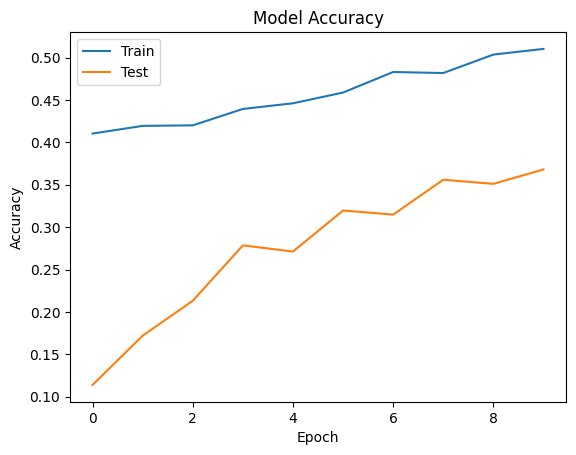

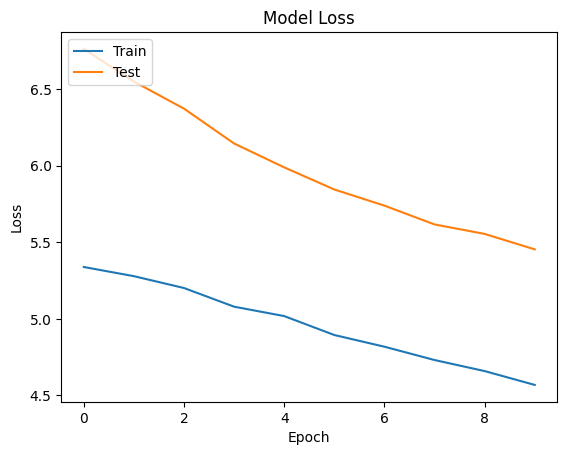

In [152]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [153]:
# Save the model to a file
model.save('bird_audio_cnn_model.h5')

In [154]:
from keras.models import load_model

# Load the model
loaded_model = load_model('bird_audio_cnn_model.h5')

In [155]:
# Predicting on new data
new_data = X_test[0:5]  # Just an example, use your new data
predictions = loaded_model.predict(new_data)

# Convert the predicted probabilities into class labels
predicted_classes = np.argmax(predictions, axis=1)
print(f"Predicted classes: {predicted_classes}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted classes: [73 77 84 38 36]


In [161]:
import os

def get_class_names(dataset_path):
    # Get the names of subdirectories (class names)
    class_names = sorted(os.listdir(dataset_path))
    return class_names

dataset_path = "/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species"
class_names = get_class_names(dataset_path)
print(class_names)

['.DS_Store', 'Andean Guan_sound', 'Andean Tinamou_sound', 'Australian Brushturkey_sound', 'Band-tailed Guan_sound', 'Barred Tinamou_sound', 'Bartletts Tinamou_sound', 'Baudo Guan_sound', 'Bearded Guan_sound', 'Berlepschs Tinamou_sound', 'Biak Scrubfowl_sound', 'Black Tinamou_sound', 'Black-billed Brushturkey_sound', 'Black-capped Tinamou_sound', 'Black-fronted Piping Guan_sound', 'Blue-throated Piping Guan_sound', 'Brazilian Tinamou_sound', 'Brown Tinamou_sound', 'Brushland Tinamou_sound', 'Buff-browed Chachalaca_sound', 'Cauca Guan_sound', 'Chaco Chachalaca_sound', 'Chestnut-bellied Guan_sound', 'Chestnut-headed Chachalaca_sound', 'Chestnut-winged Chachalaca_sound', 'Chilean Tinamou_sound', 'Choco Tinamou_sound', 'Cinereous Tinamou_sound', 'Collared Brushturkey_sound', 'Colombian Chachalaca_sound', 'Common Ostrich_sound', 'Crested Guan_sound', 'Curve-billed Tinamou_sound', 'Darwins Nothura_sound', 'Dusky Megapode_sound', 'Dusky-legged Guan_sound', 'Dwarf Cassowary_sound', 'Dwarf Tina